## 라이브러리 로딩

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

## 데이터 로딩 및 확인

In [28]:
train = pd.read_csv('data/train.csv') 
test = pd.read_csv('data/test.csv')

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [30]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [31]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


## 결측치 확인 및 처리

In [32]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [33]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [34]:
train.fillna(0,inplace = True)
test.fillna(0,inplace = True)

### 이상치 탐색

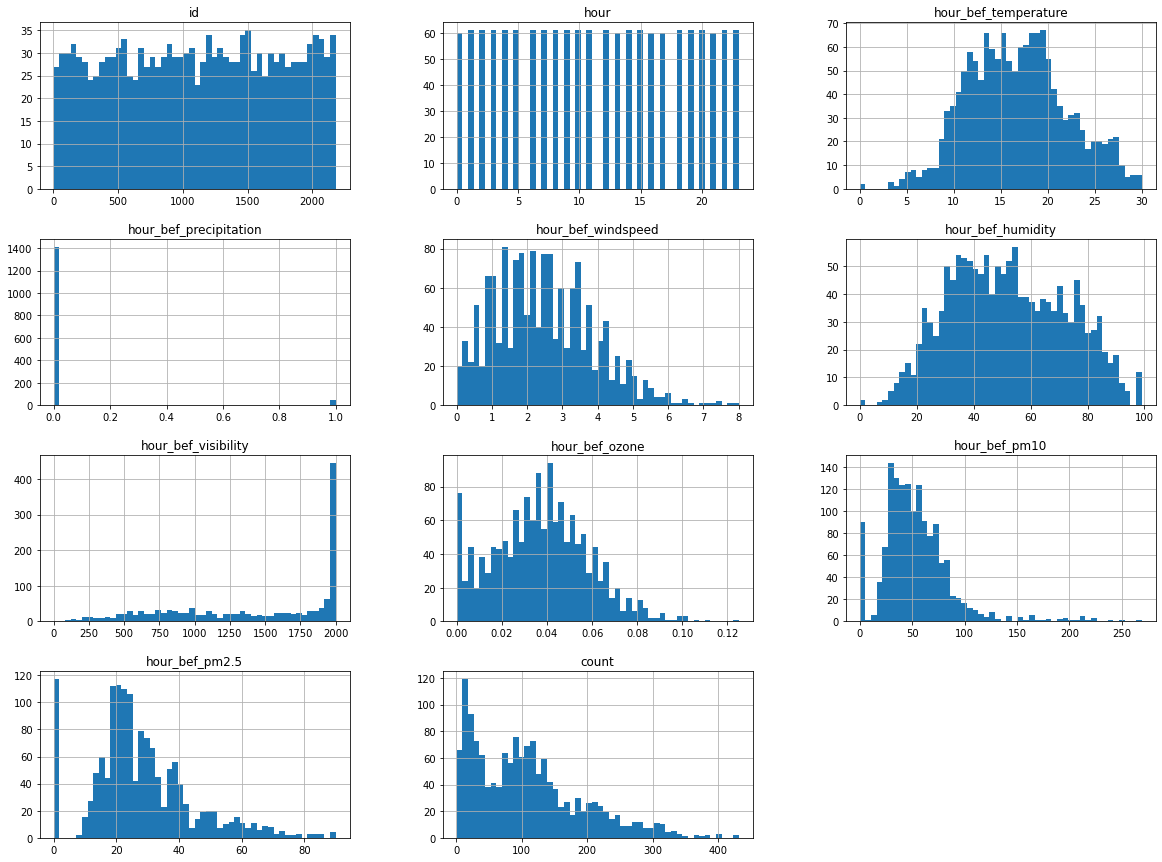

In [10]:
# 시각화
t = train.hist(bins=50, figsize=(20, 15))

In [16]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.694517,0.031528,2.463742,52.159698,1403.290610,0.037110,53.642221,27.895134,108.563400
std,631.338681,6.922790,5.271990,0.174801,1.387657,20.447997,585.047959,0.020893,33.710370,16.339987,82.631733
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,877.500000,0.022000,33.000000,19.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1576.000000,0.037000,49.000000,25.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,68.500000,1994.000000,0.051000,68.000000,36.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


<AxesSubplot:xlabel='hour', ylabel='hour_bef_temperature'>

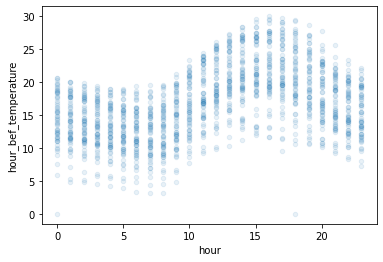

In [11]:
train.plot(kind="scatter", x="hour", y="hour_bef_temperature", alpha=0.1) # alpha : 투명도를 조절할 수 있는 파라미터

<AxesSubplot:xlabel='hour', ylabel='hour_bef_precipitation'>

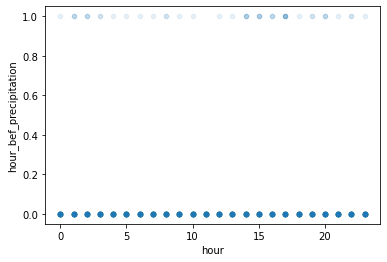

In [12]:
train.plot(kind="scatter", x="hour", y="hour_bef_precipitation", alpha=0.1) # alpha : 투명도를 조절할 수 있는 파라미터

<AxesSubplot:xlabel='hour', ylabel='hour_bef_windspeed'>

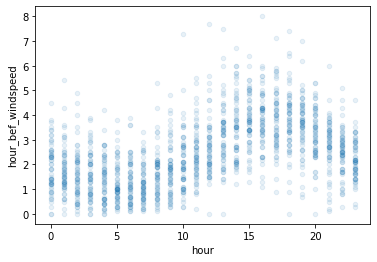

In [15]:
train.plot(kind="scatter", x="hour", y="hour_bef_windspeed", alpha=0.1) # alpha : 투명도를 조절할 수 있는 파라미터

<AxesSubplot:xlabel='hour', ylabel='hour_bef_windspeed'>

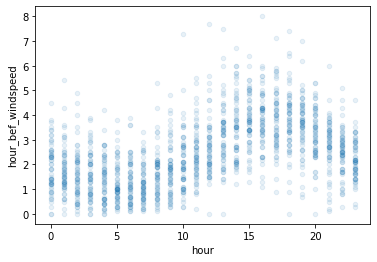

In [15]:
train.plot(kind="scatter", x="hour", y="hour_bef_windspeed", alpha=0.1) # alpha : 투명도를 조절할 수 있는 파라미터

<AxesSubplot:xlabel='hour', ylabel='hour_bef_windspeed'>

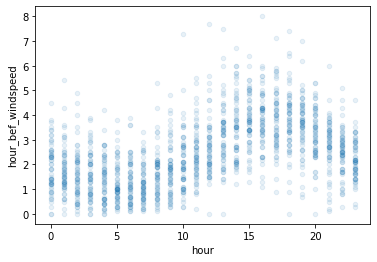

In [15]:
train.plot(kind="scatter", x="hour", y="hour_bef_windspeed", alpha=0.1) # alpha : 투명도를 조절할 수 있는 파라미터

<AxesSubplot:xlabel='hour', ylabel='hour_bef_windspeed'>

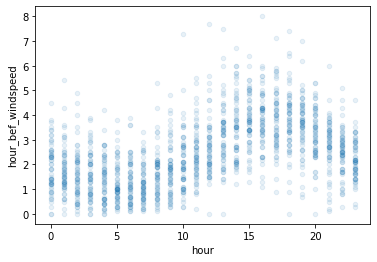

In [15]:
train.plot(kind="scatter", x="hour", y="hour_bef_windspeed", alpha=0.1) # alpha : 투명도를 조절할 수 있는 파라미터

In [35]:
def changeOutliers(data, column):
    x=data.copy()
    # Q1, Q3구하기
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    
    # 1.5 * IQR(Q3 - Q1)
    iqr = 1.5 * (q3 - q1)
    
    #이상치 대체값 설정하기
    Min = 0
    if (q1 - iqr) > 0 : Min=(q1 - iqr)
        
    Max = q3 + iqr
    
    # 이상치를 변경
    # X의 값을 직졉 변경해도 되지만 Pyhon Warning이 나오기 떄문에 인덱스를 이용
    x.loc[(x[column] > Max), column]= Max
    x.loc[(x[column] < Min), column]= Min
    
    return(x)

In [36]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.694517,0.031528,2.463742,52.159698,1403.290610,0.037110,53.642221,27.895134,108.563400
std,631.338681,6.922790,5.271990,0.174801,1.387657,20.447997,585.047959,0.020893,33.710370,16.339987,82.631733
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,877.500000,0.022000,33.000000,19.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1576.000000,0.037000,49.000000,25.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,68.500000,1994.000000,0.051000,68.000000,36.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [37]:
# id	hour	hour_bef_temperature	hour_bef_precipitation	hour_bef_windspeed	hour_bef_humidity	hour_bef_visibility	hour_bef_ozone	hour_bef_pm10	hour_bef_pm2.5	count
#연속형 데이터의 이상치 변경하기
train=changeOutliers(train, 'hour_bef_temperature')
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.697156,0.031528,2.463742,52.159698,1403.290610,0.037110,53.642221,27.895134,108.563400
std,631.338681,6.922790,5.264104,0.174801,1.387657,20.447997,585.047959,0.020893,33.710370,16.339987,82.631733
min,3.000000,0.000000,1.925000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,877.500000,0.022000,33.000000,19.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1576.000000,0.037000,49.000000,25.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,68.500000,1994.000000,0.051000,68.000000,36.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [38]:
train=changeOutliers(train, 'hour_bef_windspeed')
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.697156,0.031528,2.458533,52.159698,1403.290610,0.037110,53.642221,27.895134,108.563400
std,631.338681,6.922790,5.264104,0.174801,1.370726,20.447997,585.047959,0.020893,33.710370,16.339987,82.631733
min,3.000000,0.000000,1.925000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,877.500000,0.022000,33.000000,19.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1576.000000,0.037000,49.000000,25.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,68.500000,1994.000000,0.051000,68.000000,36.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,6.400000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [39]:
train=changeOutliers(train, 'hour_bef_humidity')
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.697156,0.031528,2.458533,52.159698,1403.290610,0.037110,53.642221,27.895134,108.563400
std,631.338681,6.922790,5.264104,0.174801,1.370726,20.447997,585.047959,0.020893,33.710370,16.339987,82.631733
min,3.000000,0.000000,1.925000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,877.500000,0.022000,33.000000,19.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1576.000000,0.037000,49.000000,25.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,68.500000,1994.000000,0.051000,68.000000,36.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,6.400000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [40]:
train=changeOutliers(train, 'hour_bef_visibility')
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.697156,0.031528,2.458533,52.159698,1403.290610,0.037110,53.642221,27.895134,108.563400
std,631.338681,6.922790,5.264104,0.174801,1.370726,20.447997,585.047959,0.020893,33.710370,16.339987,82.631733
min,3.000000,0.000000,1.925000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,877.500000,0.022000,33.000000,19.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1576.000000,0.037000,49.000000,25.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,68.500000,1994.000000,0.051000,68.000000,36.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,6.400000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [41]:
train=changeOutliers(train, 'hour_bef_ozone')
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.697156,0.031528,2.458533,52.159698,1403.290610,0.037049,53.642221,27.895134,108.563400
std,631.338681,6.922790,5.264104,0.174801,1.370726,20.447997,585.047959,0.020699,33.710370,16.339987,82.631733
min,3.000000,0.000000,1.925000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,877.500000,0.022000,33.000000,19.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1576.000000,0.037000,49.000000,25.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,68.500000,1994.000000,0.051000,68.000000,36.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,6.400000,99.000000,2000.000000,0.094500,269.000000,90.000000,431.000000


In [42]:
train=changeOutliers(train, 'hour_bef_pm10')
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.697156,0.031528,2.458533,52.159698,1403.290610,0.037049,51.832762,27.895134,108.563400
std,631.338681,6.922790,5.264104,0.174801,1.370726,20.447997,585.047959,0.020699,27.313656,16.339987,82.631733
min,3.000000,0.000000,1.925000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,877.500000,0.022000,33.000000,19.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1576.000000,0.037000,49.000000,25.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,68.500000,1994.000000,0.051000,68.000000,36.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,6.400000,99.000000,2000.000000,0.094500,120.500000,90.000000,431.000000


In [43]:
train=changeOutliers(train, 'hour_bef_pm2.5')
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.697156,0.031528,2.458533,52.159698,1403.290610,0.037049,51.832762,27.434887,108.563400
std,631.338681,6.922790,5.264104,0.174801,1.370726,20.447997,585.047959,0.020699,27.313656,15.106965,82.631733
min,3.000000,0.000000,1.925000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,877.500000,0.022000,33.000000,19.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1576.000000,0.037000,49.000000,25.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,68.500000,1994.000000,0.051000,68.000000,36.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,6.400000,99.000000,2000.000000,0.094500,120.500000,61.500000,431.000000


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

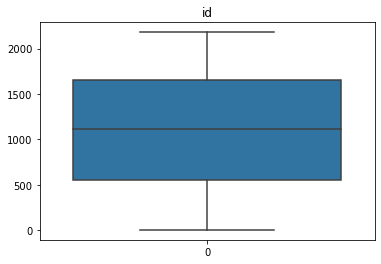

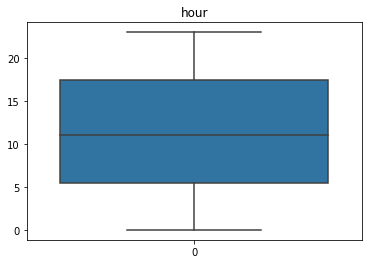

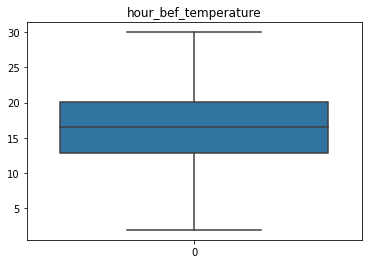

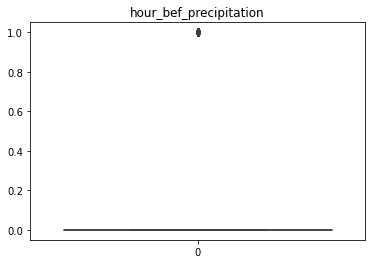

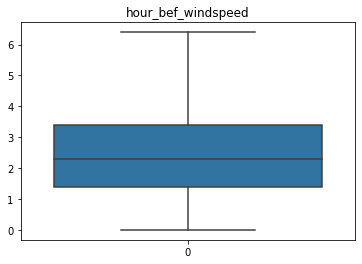

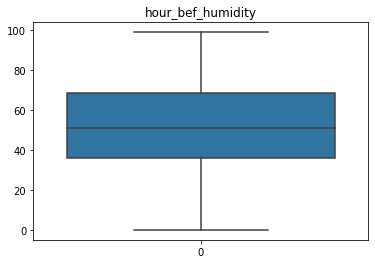

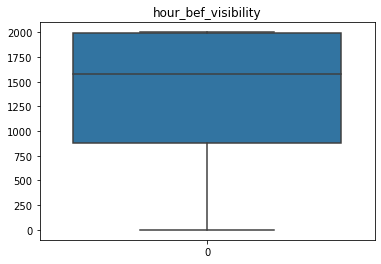

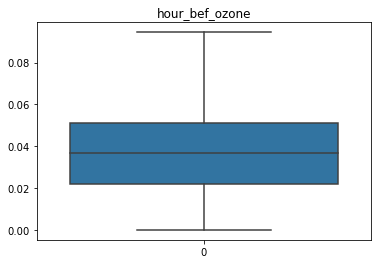

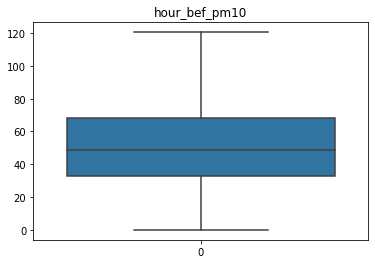

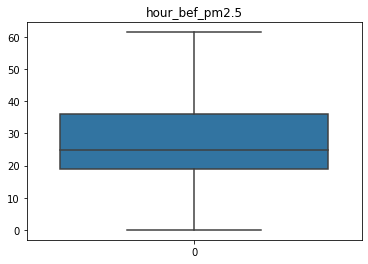

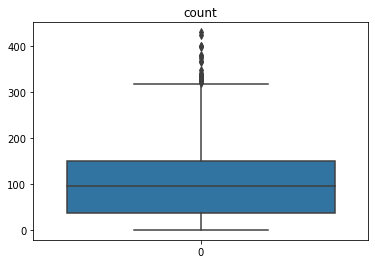

In [47]:
for column in train.columns:
  plt.figure()
  sns.boxplot(data=train[column])
  plt.title("{}".format(column))

### 스케일링

In [50]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
train_x = train.drop(['count'],axis = 1)
train_y = train['count']
x_train_scaled = std_scaler.fit_transform(train_x)

In [67]:
x_train_scaled

array([[-1.74754458,  1.22919048, -0.07547187, ..., -0.48562521,
         0.88510759,  0.36850694],
       [-1.74279114,  0.21769081,  0.64664591, ...,  0.23928494,
         0.77523476,  0.83202825],
       [-1.74120666, -0.79380886, -0.53154626, ..., -0.19566115,
        -0.72636056, -0.5585357 ],
       ...,
       [ 1.69552827, -0.93830881,  0.30459012, ..., -1.35551738,
        -0.79960911, -0.42610104],
       [ 1.69869723,  1.37369043,  0.76066451, ...,  2.17237867,
         0.70198621,  0.56715893],
       [ 1.70028171,  0.79569062,  0.83667691, ...,  0.43259431,
        -0.5066149 , -0.69097036]])

## 모델 정의 및 학습

In [59]:
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train_scaled,train_y)

RandomForestRegressor()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2)
model.fit(train_x,train_y) # X는 데이터, y는 답에 해당한다
pred = model.predict(train_x)

## 학습 된 모델로 예측 데이터 생성

In [60]:
pred = model.predict(test)

C:\Users\SOULFEVER\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## 제출파일 생성

In [61]:
submission = pd.read_csv('data/submission.csv')
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [62]:
submission['count'] = pred

In [63]:
submission

,id,count
0,0,307.58
1,1,309.02
2,2,309.67
3,4,309.44
4,5,309.44
...,...,...
710,2148,358.12
711,2149,357.64
712,2165,309.44
713,2166,309.36


In [65]:
submission.to_csv('베이스라인2.csv',index = False)